# Importing Pandas library to create a Dataframe

In [29]:
import pandas as pd 
import matplotlib.pyplot as plt



 Reading a data from txt file 
 Can use either read_csv method or read_table method
 While using csv, mention sep as '\t'

In [17]:
df = pd.read_excel('fruits.xlsx')

In [19]:
df.head()

,fruit_label,fruit_name,mass,width,height,color_score
0,1,apple,192,8.4,7.3,0.55
1,1,apple,180,8.0,6.8,0.59
2,1,apple,176,7.4,7.2,0.60
3,2,mandarin,86,6.2,4.7,0.80
4,2,mandarin,84,6.0,4.6,0.79


# Data Analysis

In [20]:
df.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [21]:
df.mean()

fruit_label      2.542373
mass           163.118644
width            7.105085
height           7.693220
color_score      0.762881
dtype: float64

In [22]:
df.columns

Index(['fruit_label', 'fruit_name', 'mass', 'width', 'height', 'color_score'], dtype='object')

In [23]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
predct = dict(zip(df.fruit_label .unique(), df.fruit_name .unique()))   
predct


{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [24]:
fname = df['fruit_name'].unique()
fname

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [25]:
fsize = df.groupby('fruit_name',sort = False).size()
fsize # It contains only integer values and not names of fruits


fruit_name
apple       19
mandarin     5
orange      19
lemon       16
dtype: int64

In [26]:
print(type(fsize))
print(fsize.dtype)

<class 'pandas.core.series.Series'>
int64


# Plotting Graph

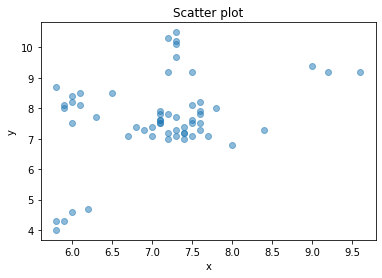

In [91]:
import matplotlib.pyplot as plt

x=df.width
y=df.height
plt.scatter(x, y, alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

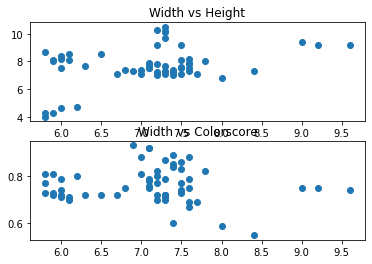

In [30]:
a =  plt.subplot(211)
a.scatter(df['width'],df['height'])
a.set_title('Width vs Height')
a =  plt.subplot(212)
a.scatter(df['width'],df['color_score'])
a.set_title('Width vs Colorscore')
plt.show()

# Taking input and output

In [49]:
x = df.drop('fruit_label' ,axis = 1)
y = df['fruit_label']

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=41)


# Normalization using min max scaler

In [ ]:
del df['fruit_name']

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
x_test.shape

(15, 4)

In [56]:
model = KNeighborsClassifier(n_neighbors = 7)

In [57]:
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [58]:
y_pred = model.predict(x_test)

In [59]:
y_pred

array([4, 1, 1, 4, 4, 4, 1, 3, 4, 1, 3, 3, 3, 1, 3])

In [60]:
y_test

49    4
9     1
10    1
58    4
52    4
46    4
15    1
14    1
54    4
8     1
41    3
38    3
42    3
31    3
33    3
Name: fruit_label, dtype: int64

# Accuray Score for classification

In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8666666666666667

In [77]:

y1 =[[176,7.4,7.2,0.60]]
y1=scaler.transform(y1) # Seperately normalizing, very important step, without doing this, you will always get Orange as answer
y1

array([[0.34965035, 0.42105263, 0.49230769, 0.13513514]])

In [79]:

y2 =[[116,6.3,7.7,0.72]]
y2=scaler.transform(y2)
y2

array([[0.13986014, 0.13157895, 0.56923077, 0.45945946]])

In [80]:
y1=model.predict(y1)
y1

array([1])

In [81]:
y2=model.predict(y2)
y2

array([4])